In [1]:
#logistic regression
import math
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#데이터에 대한 스케일 조정
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (-1,1))
df = pd.read_csv('C:/Users/admin/Desktop/새홀리기/data.csv', header = 0, engine='python')

In [3]:
#data clean
df.columns = ["grade1", "grade2", "label"]
x = df["label"].map(lambda x : float(x.rstrip(';'))) #label의 각 value마다 하나씩 꺼내서 x : 뒤의 작업을 수행한 후 다시 넣는다.

In [4]:
#종속 변수와 독립 변수 분리
X = df[["grade1", "grade2"]]
X = np.array(X) #array로 바꿔줌
X = min_max_scaler.fit_transform(X) #스케일 조정
Y = df["label"].map(lambda x : float(x.rstrip(';')))
Y = np.array(Y)

In [5]:
#data set 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33)

In [6]:
#scikit-learn으로 모델 훈련 시키기
clf = LogisticRegression()
clf.fit(X_train, Y_train)
print("score scikit-learn : ", clf.score(X_test, Y_test))

score scikit-learn :  0.9090909090909091


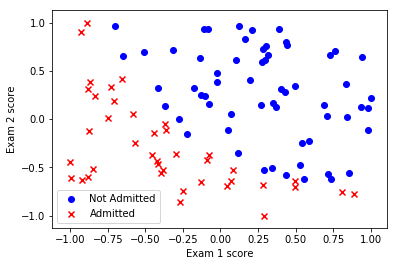

In [7]:
#visualize data
pos = where(Y == 1)
neg = where(Y == 0)
scatter(X[pos,0], X[pos,1], marker ='o', c = 'b')
scatter(X[neg,0], X[neg,1], marker = 'x', c = 'r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
show()

In [23]:
##The sigmoid function adjusts the cost function hypotheses to adjust the algorithm proportionally for worse estimations
def Sigmoid(z):
    G_of_Z = float(1.0 / float((1.0 + math.exp(-1.0*z))))
    return G_of_Z 

##The hypothesis is the linear combination of all the known factors x[i] and their current estimated coefficients theta[i] 
##This hypothesis will be used to calculate each instance of the Cost Function
def Hypothesis(theta, x):
    z = 0
    for i in range(len(theta)):
        z += x[i]*theta[i]
    return Sigmoid(z)

##For each member of the dataset, the result (Y) determines which variation of the cost function is used
##The Y = 0 cost function punishes high probability estimations, and the Y = 1 it punishes low scores
##The "punishment" makes the change in the gradient of ThetaCurrent - Average(CostFunction(Dataset)) greater
def Cost_Function(X,Y,theta,m):
    sumOfErrors = 0
    for i in range(m):
        xi = X[i]
        hi = Hypothesis(theta,xi)
        if Y[i] == 1:
            error = Y[i] * math.log(hi)
        elif Y[i] == 0:
            error = (1-Y[i]) * math.log(1-hi)
        sumOfErrors += error
    const = -1/m
    J = const * sumOfErrors
    print('cost is ', J)
    return J

In [24]:
##This function creates the gradient component for each Theta value 
##The gradient is the partial derivative by Theta of the current value of theta minus 
##a "learning speed factor aplha" times the average of all the cost functions for that theta
##For each Theta there is a cost function calculated for each member of the dataset
def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
    sumErrors = 0
    for i in range(m):
        xi = X[i]
        xij = xi[j]
        hi = Hypothesis(theta,X[i])
        error = (hi - Y[i])*xij
        sumErrors += error
    m = len(Y)
    constant = float(alpha)/float(m)
    J = constant * sumErrors
    return J

##For each theta, the partial differential 
##The gradient, or vector from the current point in Theta-space (each theta value is its own dimension) to the more accurate point, 
##is the vector with each dimensional component being the partial differential for each theta value
def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = []
    constant = alpha/m
    for j in range(len(theta)):
        CFDerivative = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
        new_theta_value = theta[j] - CFDerivative
        new_theta.append(new_theta_value)
    return new_theta

##The high level function for the LR algorithm which, for a number of steps (num_iters) finds gradients which take 
##the Theta values (coefficients of known factors) from an estimation closer (new_theta) to their "optimum estimation" which is the
##set of values best representing the system in a linear combination model
def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            #here the cost function is used to present the final hypothesis of the model in the same form for each gradient-step iteration
            Cost_Function(X,Y,theta,m)
            print('theta ', theta)	
            print('cost is ', Cost_Function(X,Y,theta,m))
    Declare_Winner(theta)

In [25]:
##This method compares the accuracy of the model generated by the scikit library with the model generated by this implementation
def Declare_Winner(theta):
    score = 0
    winner = ""
    #first scikit LR is tested for each independent var in the dataset and its prediction is compared against the dependent var
    #if the prediction is the same as the dataset measured value it counts as a point for thie scikit version of LR
    scikit_score = clf.score(X_test,Y_test)
    length = len(X_test)
    for i in range(length):
        prediction = round(Hypothesis(X_test[i],theta))
        answer = Y_test[i]
        if prediction == answer:
            score += 1
    #the same process is repeated for the implementation from this module and the scores compared to find the higher match-rate
    my_score = float(score) / float(length)
    if my_score > scikit_score:
        print('You won!')
    elif my_score == scikit_score:
        print('Its a tie!')
    else:
        print('Scikit won.. :(')
    print('Your score: ', my_score)
    print('Scikits score: ', scikit_score )

# These are the initial guesses for theta as well as the learning rate of the algorithm
# A learning rate too low will not close in on the most accurate values within a reasonable number of iterations
# An alpha too high might overshoot the accurate values or cause irratic guesses
# Each iteration increases model accuracy but with diminishing returns, 
# and takes a signficicant coefficient times O(n)*|Theta|, n = dataset length
initial_theta = [0,0]
alpha = 0.1
iterations = 1000
Logistic_Regression(X,Y,alpha,initial_theta,iterations)


cost is  0.6886958174712052
theta  [0.015808968977217012, 0.014030982200249273]
cost is  0.6886958174712052
cost is  0.6886958174712052
cost is  0.45043928326843835
theta  [1.1446039323506159, 1.030383323481578]
cost is  0.45043928326843835
cost is  0.45043928326843835
cost is  0.37210396400568835
theta  [1.7920198800927762, 1.6251057941038252]
cost is  0.37210396400568835
cost is  0.37210396400568835
cost is  0.33493174290971306
theta  [2.2378078311381255, 2.0381775708737533]
cost is  0.33493174290971306
cost is  0.33493174290971306
cost is  0.3134393548415864
theta  [2.5764517180022444, 2.35358660097723]
cost is  0.3134393548415864
cost is  0.3134393548415864
cost is  0.2995143683386589
theta  [2.8487364478320787, 2.608155678935002]
cost is  0.2995143683386589
cost is  0.2995143683386589
cost is  0.2898100759552151
theta  [3.0758031030008572, 2.8210921909376734]
cost is  0.2898100759552151
cost is  0.2898100759552151
cost is  0.2826976528686292
theta  [3.2700162725064694, 3.003664875

In [2]:
#logistic을 이용한 nlp application(스팸 분류기)
from __future__ import print_function
import pandas as pd
import numpy as np

In [15]:
#데이터 불러오기
path = "C:/users/admin/Desktop/새홀리기/sms.tsv"
sms = pd.read_table(path, header = None, engine='python', names = ['label', 'message'], error_bad_lines=False)
#ParserError: '	' expected after '"'의 해결법 : 파일에 문제가 있는것이니 error_bad_lines사용하여 그 줄을 제외한다.

Skipping line 283: '	' expected after '"'
Skipping line 617: '	' expected after '"'
Skipping line 801: '	' expected after '"'
Skipping line 1421: '	' expected after '"'
Skipping line 4095: '	' expected after '"'
Skipping line 4133: '	' expected after '"'
Skipping line 4227: '	' expected after '"'
Skipping line 4554: '	' expected after '"'
Skipping line 4862: '	' expected after '"'
Skipping line 5082: '	' expected after '"'


In [16]:
#데이터 둘러보기
sms.shape

(5562, 2)

In [17]:
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [18]:
sms.label.value_counts() #label의 분포

ham     4815
spam     747
Name: label, dtype: int64

In [19]:
#분류를 위해 label을 숫자로 바꾼다,
sms['label_num'] = sms.label.map({'ham' : 0, 'spam' : 1})

In [22]:
sms.head(10)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [23]:
#x,y지정
X = sms.message
Y = sms.label_num

In [25]:
#데이터 분리
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4171,)
(1391,)
(4171,)
(1391,)


In [31]:
#문서를 벡터화 한다.
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_train_dtm
X_test_dtm

<1391x7457 sparse matrix of type '<class 'numpy.int64'>'
	with 17143 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C = 1e5)
%time clf.fit(X_train_dtm, Y_train)

Wall time: 236 ms


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [35]:
#X_test에 대한 Y_prediction
Y_pred_class = clf.predict(X_test_dtm)

In [37]:
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_pred_class)

0.9834651329978433

In [39]:
metrics.confusion_matrix(Y_test, Y_pred_class)

array([[1193,    4],
       [  19,  175]], dtype=int64)

In [40]:
#잘못 분류된 데이터 출력해보기
X_test[Y_test < Y_pred_class] #false positive

2336    Cheers for the message Zogtorius. I혪ve been st...
3344    No problem baby. Is this is a good time to tal...
4005    Forgot you were working today! Wanna chat, but...
4489    Hope this text meets you smiling. If not then ...
Name: message, dtype: object

In [41]:
X_test[Y_test > Y_pred_class] #false negative

3456    Not heard from U4 a while. Call me now am here...
1456    Bought one ringtone and now getting texts cost...
2243    Hi ya babe x u 4goten bout me?' scammers getti...
3415    LIFE has never been this much fun and great un...
4012    You will be receiving this week's Triple Echo ...
2911    Sorry! U can not unsubscribe yet. THE MOB offe...
4387    RECPT 1/3. You have ordered a Ringtone. Your o...
1773                    Call FREEPHONE 0800 542 0578 now!
2819    ROMCAPspam Everyone around should be respondin...
729     Email AlertFrom: Jeri StewartSize: 2KBSubject:...
4288    Kit Strip - you have been billed 150p. Netcoll...
3844    Fantasy Football is back on your TV. Go to Sky...
3881    A link to your picture has been sent. You can ...
1936    More people are dogging in your area now. Call...
2360    Fantasy Football is back on your TV. Go to Sky...
1634    0A$NETWORKS allow companies to bill for SMS, s...
1042    We know someone who you know that fancies you....
3746    Dear V

In [43]:
#X_test에 대한 확률값 계산
Y_pred_prob = clf.predict_proba(X_test_dtm)[: ,1]
Y_pred_prob

array([8.10646929e-08, 2.31314176e-09, 6.87063461e-14, ...,
       1.00000000e+00, 2.18292384e-05, 1.25361488e-06])

In [45]:
#AUC
metrics.roc_auc_score(Y_test, Y_pred_prob)

0.9882739494785072

In [48]:
#DecisionTree를 이용한 분류
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [50]:
#훈련데이터로 모델 훈련
%time clf.fit(X_train_dtm, Y_train)

Wall time: 468 ms


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
#예측값 출력
Y_pred_class = clf.predict(X_test_dtm)

In [54]:
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_pred_class)

0.9633357296908699

In [56]:
metrics.confusion_matrix(Y_test, Y_pred_class)

array([[1176,   21],
       [  30,  164]], dtype=int64)

In [57]:
X_test[Y_test < Y_pred_class]

4741    The beauty of life is in next second.. which h...
2336    Cheers for the message Zogtorius. I혪ve been st...
5292    About  &lt;#&gt; bucks. The banks fees are fix...
4063    Fyi I'm gonna call you sporadically starting a...
1321    I thk 50 shd be ok he said plus minus 10.. Did...
4694                               I liked the new mobile
984     I'm in office now . I will call you  &lt;#&gt;...
3321    I don wake since. I checked that stuff and saw...
4758    if you text on your way to cup stop that shoul...
2366    A Boy loved a gal. He propsd bt she didnt mind...
5094    A Boy loved a gal. He propsd bt she didnt mind...
329     I'm reading the text i just sent you. Its mean...
100     Please don't text me anymore. I have nothing e...
573                                Waiting for your call.
5298    I'm coming back on Thursday. Yay. Is it gonna ...
678     Missed your call cause I was yelling at scrapp...
3144    Oh thats late! Well have a good night and i wi...
4806          

In [58]:
X_test[Y_test > Y_pred_class]

3378    complimentary 4 STAR Ibiza Holiday or 짙10,000 ...
3456    Not heard from U4 a while. Call me now am here...
2243    Hi ya babe x u 4goten bout me?' scammers getti...
3415    LIFE has never been this much fun and great un...
4012    You will be receiving this week's Triple Echo ...
3635    Customer service announcement. We recently tri...
2067    Sexy Singles are waiting for you! Text your AG...
2911    Sorry! U can not unsubscribe yet. THE MOB offe...
4387    RECPT 1/3. You have ordered a Ringtone. Your o...
867     What do U want for Xmas? How about 100 free te...
1773                    Call FREEPHONE 0800 542 0578 now!
1683    todays vodafone numbers ending with 0089(my la...
3560    Auction round 4. The highest bid is now 짙54. N...
2819    ROMCAPspam Everyone around should be respondin...
729     Email AlertFrom: Jeri StewartSize: 2KBSubject:...
4242    accordingly. I repeat, just text the word ok o...
4236    Show ur colours! Euro 2004 2-4-1 Offer! Get an...
1134    Dont f

In [59]:
Y_pred_prob = clf.predict_proba(X_test_dtm)[:,1]
Y_pred_prob

array([0., 0., 0., ..., 1., 0., 0.])

In [60]:
metrics.roc_auc_score(Y_test, Y_pred_prob)

0.9139084825465726

In [1]:
#나이브 베이즈를 이용한 감정분석
import sys
import os
import time

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
def usage():
    print("Usage : ")
    print("python %s <data_dir>" % sys.argv[0])
    
if __name__ == '__main__':
    
    if len(sys.argv) < 2:
        usage()
        sys.exit(1)
        
    data_dir = sys.argv[1]
    classes = ['pos', 'neg']
    
    trian_data = []
    train_labels = []
    test_data = []
    test_labels = []
    for curr_class in classes:
        dirname = os.path.join(data_dir, curr_class)
        for fname in os.listdir(dirname):
            with open(os.path.join(dirname, fname), 'r') as f:
                content = f.read()
                if fname.startswith('cv9'):
                    test_data.append(content)
                    test_labels.append(curr_class)
                else:
                    train_data.append(contetnt)
                    train_labels.append(curr_class)
    
    
    vectorizer = TfidfVectorizer(min_df = 5,
                                 max_df = 0.8,
                                 sublinear_tf = True,
                                 use_idf = True)
    train_vectors = vectorizer.fit_transform(train_data)
    test_vectors = vectorizer.transform(test_data)
    
    clf = MultinomialNB()
    t0 = time.time()
    clf.fit(train_vectors, train_labels)
    t1 = time.time()
    prediction = clf.predict(test_vectors)
    
    t2 = time.time()
    time_train = t1- t0
    time_predict = t2 - t1
    
    # Print results in a nice table
    print("Results for NaiveBayes (MultinomialNB) ")
    print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))
    print(classification_report(test_labels, prediction))
    print "Reviews Prediction"
    print prediction[10] + "----"+test_data[10]

    print "\nReviews Prediction"
    print prediction[100] + "----" + test_data[100]
    
    
    
    
    

In [ ]:
#SVM을 이용한 감정분석
# Run this script with command line argument
# python sentimentanalysis_SVM.py /home/jalaj/PycharmProjects/NLPython/NLPython/ch8/sentimentanalysis/data  /home/jalaj/PycharmProjects/NLPython/NLPython/ch8/sentimentanalysis/data

import sys
import os
import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

def usage():
    print("Usage:")
    print("python %s <data_dir>" % sys.argv[0])

if __name__ == '__main__':

    if len(sys.argv) < 2:
        usage()
        sys.exit(1)

    data_dir = sys.argv[1]
    classes = ['pos', 'neg']

    # Read the data
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []
    for curr_class in classes:
        dirname = os.path.join(data_dir, curr_class)
        for fname in os.listdir(dirname):
            with open(os.path.join(dirname, fname), 'r') as f:
                content = f.read()
                if fname.startswith('cv9'):
                    test_data.append(content)
                    test_labels.append(curr_class)
                else:
                    train_data.append(content)
                    train_labels.append(curr_class)

    # Create feature vectors
    vectorizer = TfidfVectorizer(min_df=5,
                                 max_df = 0.8,
                                 sublinear_tf=True,
                                 use_idf=True)
    train_vectors = vectorizer.fit_transform(train_data)
    test_vectors = vectorizer.transform(test_data)

    # Perform classification with SVM, kernel=rbf
    classifier_rbf = svm.SVC()
    t0 = time.time()
    classifier_rbf.fit(train_vectors, train_labels)
    t1 = time.time()
    prediction_rbf = classifier_rbf.predict(test_vectors)
    t2 = time.time()
    time_rbf_train = t1-t0
    time_rbf_predict = t2-t1

    # Perform classification with SVM, kernel=linear
    classifier_linear = svm.SVC(kernel='linear')
    t0 = time.time()
    classifier_linear.fit(train_vectors, train_labels)
    t1 = time.time()
    prediction_linear = classifier_linear.predict(test_vectors)
    t2 = time.time()
    time_linear_train = t1-t0
    time_linear_predict = t2-t1

    # Perform classification with SVM, kernel=linear
    classifier_liblinear = svm.LinearSVC()
    t0 = time.time()
    classifier_liblinear.fit(train_vectors, train_labels)
    t1 = time.time()
    prediction_liblinear = classifier_liblinear.predict(test_vectors)
    t2 = time.time()
    time_liblinear_train = t1-t0
    time_liblinear_predict = t2-t1

    # Print results in a nice table
    print("Results for SVC(kernel=rbf)")
    print("Training time: %fs; Prediction time: %fs" % (time_rbf_train, time_rbf_predict))
    print(classification_report(test_labels, prediction_rbf))
    print("Results for SVC(kernel=linear)")
    print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
    print(classification_report(test_labels, prediction_linear))
    print("Results for LinearSVC()")
    print("Training time: %fs; Prediction time: %fs" % (time_liblinear_train, time_liblinear_predict))
    print(classification_report(test_labels, prediction_liblinear))


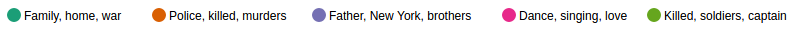

In [6]:
#K-means-clustering을 이용한 문서분류 애플리케이션
from IPython.display import Image
Image(filename = 'C:/Users/admin/Desktop/새홀리기/kmeanexample.png')

In [8]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [14]:
#데이터(import three lists: titles, links and wikipedia synopses)
titles = open('C:/Users/admin/Desktop/새홀리기/title_list.txt').read().split('\n')
titles = titles[:100]
links = open('C:/Users/admin/Desktop/새홀리기/link_list_imdb.txt').read().split('\n')
links = links[:100]
synopses_wiki = open('C:/Users/admin/Desktop/새홀리기/synopses_list_wiki.txt','rt',encoding = 'UTF8').read().split('\n BREAKS HERE')
synopses_wiki = synopses_wiki[:100]

synopses_clean_wiki = []
for text in synopses_wiki:
    text = BeautifulSoup(text, 'html.parser').getText()
    synopses_clean_wiki.append(text) #html형식을 unicide로 바꿔줌
    
synopses_wiki = synopses_clean_wiki

genres = open('C:/Users/admin/Desktop/새홀리기/genres_list.txt').read().split('\n')
genres = genres[:100]

print(str(len(titles)) + 'titles')
print(str(len(links)) + 'links')
print(str(len(synopses_wiki)) + 'synopses')
print(str(len(genres)) + 'genres')

100titles
100links
100synopses
100genres


In [17]:
synopses_imdb = open('C:/Users/admin/Desktop/새홀리기/synopses_list_imdb.txt').read().split('\n BREAKS HERE')
synopses_imdb = synopses_imdb[:100]

synopses_clean_imdb = []

for text in synopses_imdb:
    text = BeautifulSoup(text, 'html.parser').getText()
    synopses_clean_imdb.append(text)
    
synopses_imdb = synopses_clean_imdb

In [20]:
synopses = []

for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)

In [21]:
#제목에 인덱스 생성
ranks = []
for i in range(0, len(titles)):
    ranks.append(i)

In [22]:
#nltk에서 불용어 제거 
stopwords = nltk.corpus.stopwords.words('english')

In [24]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

In [31]:
#단어의 어간을 출력하는 tokenizer와 stemmer
def tokenize_and_stem(text):
    #문장을 한번 tokenize하고 그 문장을 다시 tokenize(.을 잡아 낼 수 있다.)
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    filtered_tokens = []
    #알파벳만 출력으로 남김
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
            
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens   

In [36]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed) #extend는 list를 요소로 붙여준다.
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [37]:
vocab_frame = pd.DataFrame({'words' : totalvocab_tokenized}, index = totalvocab_stemmed)

In [42]:
#input vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df = 0.8, max_features = 200000,
                                   min_df = 0.2, stop_words = 'english',
                                   use_idf = True, tokenizer = tokenize_and_stem, ngram_range = (1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #synopses를 벡터화

print(tfidf_matrix.shape)

Wall time: 19.3 s
(100, 563)


In [45]:
#feature 확인
terms = tfidf_vectorizer.get_feature_names()

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [53]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters = num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 1.08 s


In [51]:
from sklearn.externals import joblib

km = joblib.load('C:/Users/admin/Desktop/새홀리기/doc_cluster.pkl')
cluster = km.labels_.tolist()

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator KMeans from version pre-0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The file 'C:/Users/admin/Desktop/새홀리기/doc_cluster.pkl' has been generated with a joblib version less than 0.10. Please regenerate this pickle file.
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
import pandas as pd

films = {'title' : titles, 'rank' : ranks, 'synopsis' : synopses, 'cluster' : clusters, 'genre' : genres}
frame = pd.DataFrame(films, index = [clusters], columns = ['rank', 'title', 'cluster', 'genre'])


In [55]:
frame['cluster'].value_counts()

4    32
3    30
2    26
1     8
0     4
Name: cluster, dtype: int64

In [56]:
grouped = frame['rank'].groupby(frame['cluster'])
grouped.mean()

cluster
0    72.2500
1    54.1250
2    58.0000
3    39.8000
4    47.6875
Name: rank, dtype: float64

In [58]:

from __future__ import print_function

print("Top terms per cluster : ")
print()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(num_clusters):
    print("Cluster %d words : " % i, end = '')
    for ind in order_centroids[i, :6]:
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore' ), end=',')
    print()
    print()
    print("Cluster %d titles : " % i, end = '')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end = '')
    print()
    print()

Top terms per cluster : 

Cluster 0 words :  b'perform', b'music', b'ii', b'family', b'singing', b'join',

Cluster 0 titles :  Amadeus, Giant, Nashville, Yankee Doodle Dandy,

Cluster 1 words :  b'town', b'killed'

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


, b'little', b'men', b'gun', b"n't",

Cluster 1 titles :  Saving Private Ryan, Unforgiven, To Kill a Mockingbird, Butch Cassidy and the Sundance Kid, The Treasure of the Sierra Madre, High Noon, The Grapes of Wrath, Shane,

Cluster 2 words :  b'car', b'police', b'killed', b'father', b'murders', b'driving',

Cluster 2 titles :  The Godfather, Casablanca, The Godfather: Part II, Psycho, Sunset Blvd., Vertigo, West Side Story, The Silence of the Lambs, Chinatown, The Good, the Bad and the Ugly, Goodfellas, The French Connection, It Happened One Night, Rain Man, Fargo, Network, American Graffiti, Pulp Fiction, The Maltese Falcon, A Clockwork Orange, Taxi Driver, Double Indemnity, Rebel Without a Cause, Rear Window, The Third Man, North by Northwest,

Cluster 3 words :  b'army', b'soldiers', b'killed', b'war', b'captain', b'command',

Cluster 3 titles :  The Shawshank Redemption, Schindler's List, One Flew Over the Cuckoo's Nest, The Wizard of Oz, Titanic, Lawrence of Arabia, The Sound of M

In [59]:
#This is purely to help export tables to html and to correct for my 0 start rank (so that Godfather is 1, not 0)
frame['Rank'] = frame['rank'] + 1
frame['Title'] = frame['title']

In [60]:
#export tables to HTML
print(frame[['Rank', 'Title']].loc[frame['cluster'] == 1].to_html(index=False))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Rank</th>
      <th>Title</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>37</td>
      <td>Saving Private Ryan</td>
    </tr>
    <tr>
      <td>38</td>
      <td>Unforgiven</td>
    </tr>
    <tr>
      <td>43</td>
      <td>To Kill a Mockingbird</td>
    </tr>
    <tr>
      <td>53</td>
      <td>Butch Cassidy and the Sundance Kid</td>
    </tr>
    <tr>
      <td>54</td>
      <td>The Treasure of the Sierra Madre</td>
    </tr>
    <tr>
      <td>57</td>
      <td>High Noon</td>
    </tr>
    <tr>
      <td>79</td>
      <td>The Grapes of Wrath</td>
    </tr>
    <tr>
      <td>80</td>
      <td>Shane</td>
    </tr>
  </tbody>
</table>
